In [1]:
import os
print(os.listdir())

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'KNN.ipynb', 'Social_Network_Ads.csv']


In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv('./Social_Network_Ads.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [8]:
#split dataset
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [9]:
X


array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
#prepare data for training and test
from sklearn.model_selection import train_test_split



In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [14]:
x_test

array([[    48,  29000],
       [    35,  77000],
       [    40,  60000],
       [    60,  83000],
       [    42,  75000],
       [    55, 125000],
       [    48, 138000],
       [    39, 134000],
       [    35,  50000],
       [    54,  26000],
       [    39,  42000],
       [    48,  30000],
       [    35,  72000],
       [    37,  71000],
       [    40,  65000],
       [    59, 143000],
       [    30,  49000],
       [    26,  17000],
       [    40, 142000],
       [    42,  80000],
       [    26,  35000],
       [    38,  55000],
       [    35,  20000],
       [    47,  30000],
       [    36,  33000],
       [    47, 107000],
       [    47,  51000],
       [    35,  57000],
       [    28,  55000],
       [    30, 107000],
       [    37,  53000],
       [    33, 113000],
       [    35,  55000],
       [    58,  23000],
       [    49,  74000],
       [    41,  87000],
       [    59,  29000],
       [    49,  88000],
       [    24,  32000],
       [    42,  90000],


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
x_train

array([[ 1.13562231,  0.46338023],
       [ 1.5245965 ,  0.34439795],
       [ 0.45491747, -0.51822363],
       [ 1.03837876,  2.09938668],
       [ 0.06594328, -0.60746035],
       [-1.78168413, -1.52957307],
       [ 0.55216102,  1.74243982],
       [ 1.13562231,  0.55261695],
       [ 0.84389166,  0.25516123],
       [-1.29546639, -1.52957307],
       [-1.00373574, -0.39924135],
       [ 0.06594328,  1.26651067],
       [-1.00373574, -0.36949577],
       [ 2.10805778,  1.77218539],
       [ 1.81632714,  0.99880052],
       [-1.58719703, -1.61880979],
       [ 0.94113521, -0.63720592],
       [-0.12854381,  1.41523853],
       [ 1.13562231, -1.26186292],
       [ 1.03837876,  0.10643337],
       [-0.9064922 , -0.99415278],
       [-1.48995348, -1.55931864],
       [ 0.16318683,  0.13617895],
       [ 0.74664811, -1.14288064],
       [ 0.84389166,  1.38549296],
       [ 0.94113521,  1.0285461 ],
       [-1.48995348, -1.2916085 ],
       [ 0.84389166, -0.87517049],
       [ 0.94113521,

In [17]:
#move KNN algorithm
from sklearn.neighbors import KNeighborsClassifier


In [18]:
classifier = KNeighborsClassifier(n_neighbors=5 , p=2, metric='minkowski')
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
#get your predictor
y_predictor = classifier.predict(x_test)

In [20]:
y_predictor

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [21]:
#in classifiers, you will be creating a confusion matrix alot
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictor)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


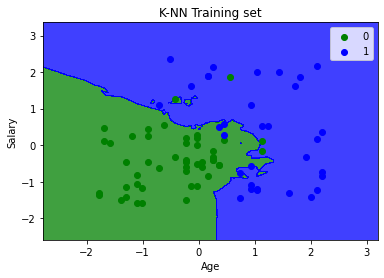

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_point, y_point = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_point)):
    plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('K-NN Training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
